<a href="https://colab.research.google.com/github/SasikiranJ/Hand-Sign-Language-Detection-Using-Convolutional-Neural-Networks/blob/master/Sign_language_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.models import Sequential,load_model
from keras.layers import LeakyReLU
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

In [0]:
 from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
 training_set = train_datagen.flow_from_directory("signs/train",
                                                  target_size = (100, 100),
                                                  batch_size = 16,
                                                  class_mode = "categorical",
                                                  shuffle = False)

test_set = test_datagen.flow_from_directory("signs/test",
                                            target_size = (100, 100),
                                            batch_size = 1,
                                            class_mode = "categorical",
                                            shuffle= False)

Found 2000 images belonging to 10 classes.
Found 62 images belonging to 10 classes.


In [0]:
model = Sequential()
model.add(ZeroPadding2D(2, input_shape=(100,100, 3)))
model.add(Conv2D(32, (5, 5), strides = (1, 1), name = 'conv0'))
model.add(Conv2D(32, (5, 5), strides = (1, 1)))
model.add(LeakyReLU(alpha = 0.3))
model.add(BatchNormalization(axis = 3, name = 'bn0'))

model.add(Conv2D(64, (5, 5), strides = (1, 1), name = 'conv1'))
model.add(Conv2D(64, (5, 5), strides = (1, 1)))
model.add(LeakyReLU(alpha = 0.3))
model.add(BatchNormalization(axis = 3, name = 'bn1'))


model.add(Conv2D(128, (5, 5), strides = (1, 1), name = 'conv2'))
model.add(Conv2D(128, (5, 5), strides = (1, 1)))
model.add(LeakyReLU(alpha = 0.3))
model.add(BatchNormalization(axis = 3, name = 'bn2'))

model.add(Conv2D(512, (5, 5), strides = (1, 1), name = 'conv3'))
model.add(Conv2D(512, (5, 5), strides = (1, 1)))
model.add(LeakyReLU(alpha = 0.3))
model.add(BatchNormalization(axis = 3, name = 'bn3'))



model.add(MaxPooling2D((2, 2), name='max_pool1'))
model.add(Flatten())
model.add(Dense(50, name='fc1'))
model.add(LeakyReLU(alpha = 0.3))
model.add(Dense(10, activation='softmax', name='fc2'))



In [0]:
model.compile(optimizer = "RMSProp", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [21]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
top_model_weights_path = "Best_model.h5"
# Defining callbacks to use early-stopping method for reducing computation after there is no improvement 
callbacks = [EarlyStopping(monitor='val_loss', patience=30,verbose=1,mode='auto'),
             ModelCheckpoint(filepath=top_model_weights_path, monitor='val_accuracy',verbose=1, save_best_only=True)]

model.fit_generator(training_set,

                    steps_per_epoch = 125,

                    epochs= 50,

                    callbacks= callbacks,

                    validation_data = test_set)

Epoch 1/50
125/125 [==============================] - 23s 180ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 0.7258

Epoch 00001: val_accuracy improved from -inf to 0.72581, saving model to Best_model.h5
Epoch 2/50
125/125 [==============================] - 22s 179ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 0.7258

Epoch 00002: val_accuracy did not improve from 0.72581
Epoch 3/50
125/125 [==============================] - 22s 179ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 0.7258

Epoch 00003: val_accuracy did not improve from 0.72581
Epoch 4/50
125/125 [==============================] - 22s 179ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 0.7258

Epoch 00004: val_accuracy did not improve from 0.72581
Epoch 5/50
125/125 [==============================] - 22s 180ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - 

[8]


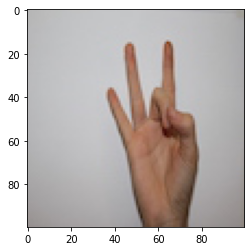

In [22]:
model_opt= load_model("Best_model.h5")
img_path ="signs/test/8/IMG_1136.JPG"

img = image.load_img(img_path, target_size=(100, 100))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(model_opt.predict_classes(x))

In [23]:
from sklearn.metrics import confusion_matrix,classification_report
model_opt = load_model("Best_model.h5")
test_set.reset()
pred= model_opt.predict_generator(test_set)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (test_set.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
#predictions = [labels[k] for k in predicted_class_indices]

#print(predicted_class_indices)
#print(test_set.classes)
print(confusion_matrix(test_set.classes,predicted_class_indices))
print(classification_report(test_set.classes,predicted_class_indices))


[[5 0 0 0 0 0 0 0 0 0]
 [0 6 0 0 0 0 0 0 0 0]
 [0 1 3 0 0 0 1 1 0 0]
 [0 1 0 4 0 0 0 0 0 1]
 [0 0 0 0 7 0 0 0 0 0]
 [0 0 0 1 0 5 0 0 0 1]
 [0 0 0 0 1 0 4 2 0 0]
 [0 1 0 0 0 0 0 5 0 0]
 [0 0 0 0 1 1 0 1 4 1]
 [0 1 0 0 0 0 0 0 0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.60      1.00      0.75         6
           2       1.00      0.50      0.67         6
           3       0.80      0.67      0.73         6
           4       0.78      1.00      0.88         7
           5       0.83      0.71      0.77         7
           6       0.80      0.57      0.67         7
           7       0.56      0.83      0.67         6
           8       1.00      0.50      0.67         8
           9       0.50      0.75      0.60         4

    accuracy                           0.74        62
   macro avg       0.79      0.75      0.74        62
weighted avg       0.80      0.74      0.74        62

